# Exercises II

Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

## Imports

In [35]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from env import get_db_url
import wrangle as w

## 1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

In [4]:
def check_file_exists(filename, query, url):
    if os.path.exists(filename):
        # print('File exists - reading CSV file')
        df = pd.read_csv(filename, index_col=0)
    else:
        # print('File does not exist - creating CSV file')
        df = pd.read_sql(query,url)
        df.to_csv(filename)
    return df

In [5]:
def acquire_zillow():
    filename = 'zillow.csv'
    url = get_db_url('zillow')
    query = """
   select bedroomcnt, 
        bathroomcnt,
        calculatedfinishedsquarefeet,
        taxvaluedollarcnt,
        yearbuilt,
        taxamount, 
        fips 
    from properties_2017 as p
    join propertylandusetype as l
        on p.propertylandusetypeid = l.propertylandusetypeid
    where propertylandusedesc in ('Single Family Residential')
    """

    df = check_file_exists(filename,query,url)
    return df

In [7]:
df = acquire_zillow()

In [8]:
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


## 2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2152852 non-null  float64
 1   bathroomcnt                   2152852 non-null  float64
 2   calculatedfinishedsquarefeet  2144379 non-null  float64
 3   taxvaluedollarcnt             2152370 non-null  float64
 4   yearbuilt                     2143526 non-null  float64
 5   taxamount                     2148421 non-null  float64
 6   fips                          2152863 non-null  float64
dtypes: float64(7)
memory usage: 131.4 MB


In [10]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [11]:
for col in df.columns:
    print(col)
    print(df[col].isna().sum())
    print()

bedroomcnt
11

bathroomcnt
11

calculatedfinishedsquarefeet
8484

taxvaluedollarcnt
493

yearbuilt
9337

taxamount
4442

fips
0



In [12]:
for col in df.columns:
    df = df.dropna()
df

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [13]:
for col in df.columns:
    print(col)
    print(df[col].isna().sum())
    print()

bedroomcnt
0

bathroomcnt
0

calculatedfinishedsquarefeet
0

taxvaluedollarcnt
0

yearbuilt
0

taxamount
0

fips
0



In [14]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  float64
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


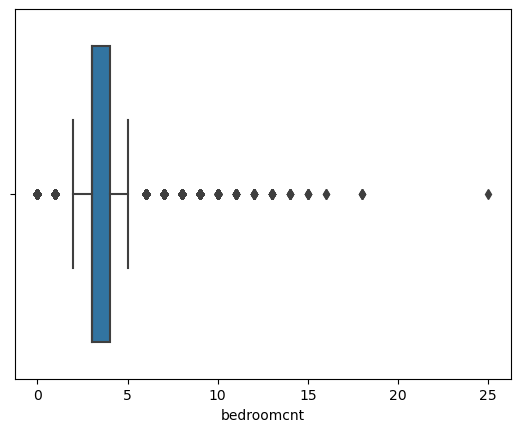

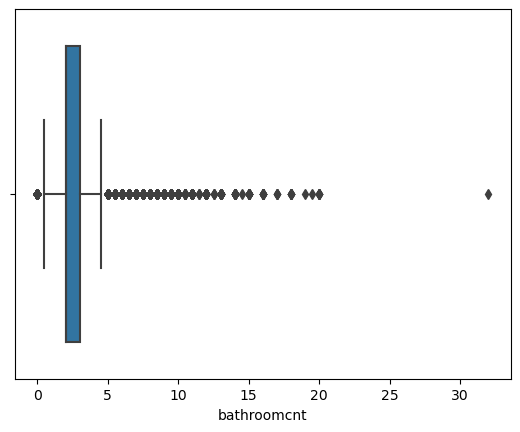

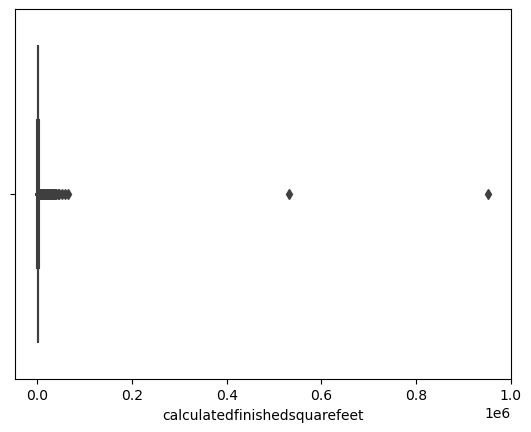

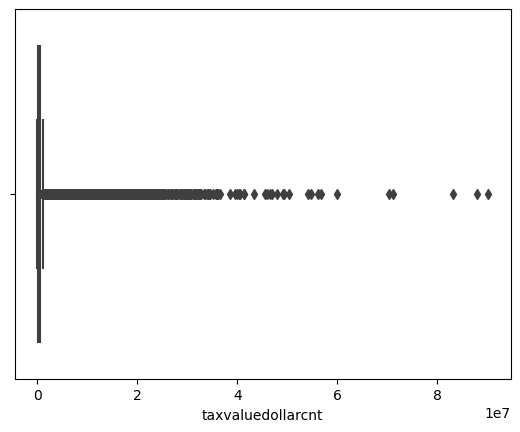

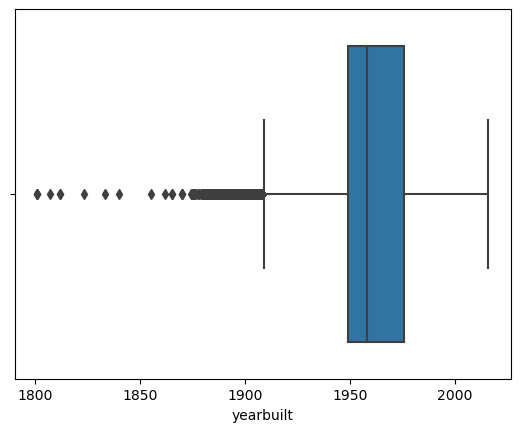

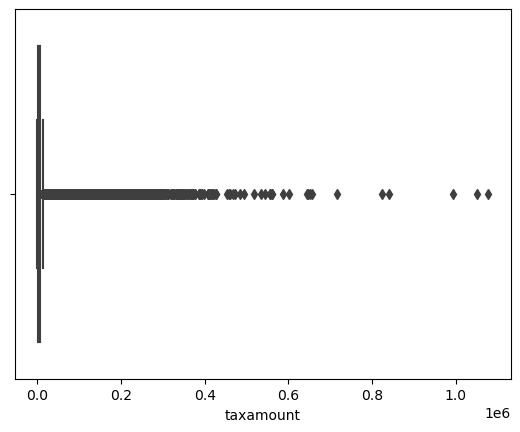

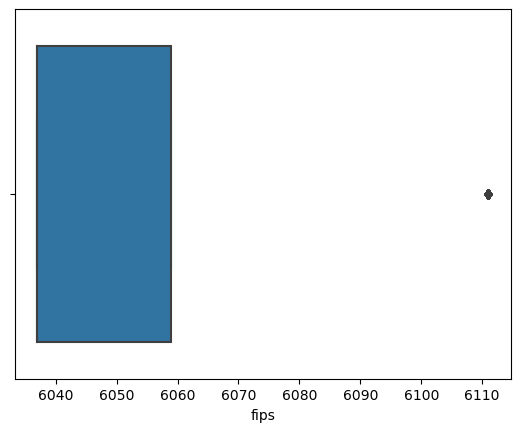

In [15]:
for col in df.columns:
    sns.boxplot(df,x=df[col])
    plt.show();

In [16]:
for col in df.columns:
    print(df[col].value_counts())
    print()

bedroomcnt
3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: count, dtype: int64

bathroomcnt
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: count, dtype: int64

calculatedfinishedsquarefeet
1

In [17]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2140235 non-null  float64
 1   bathroomcnt                   2140235 non-null  float64
 2   calculatedfinishedsquarefeet  2140235 non-null  float64
 3   taxvaluedollarcnt             2140235 non-null  float64
 4   yearbuilt                     2140235 non-null  float64
 5   taxamount                     2140235 non-null  float64
 6   fips                          2140235 non-null  float64
dtypes: float64(7)
memory usage: 130.6 MB


In [18]:
df = df.rename(columns={'bedroomcnt': 'bed_count', 
                       'bathroomcnt' : 'bath_count',
                       'calculatedfinishedsquarefeet' : 'sq_ft',
                       'taxvaluedollarcnt': 'property_value',
                       'yearbuilt': 'year_built',
                       'taxamount': 'tax_amount'})

In [19]:
df

,bed_count,bath_count,sq_ft,property_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [20]:
df = df.reset_index().drop(columns='index')

In [21]:
df

,bed_count,bath_count,sq_ft,property_value,year_built,tax_amount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2140230,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2140231,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2140232,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2140233,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [26]:
def prep_zillow(df):
    df = df.dropna()
    df = df.rename(columns={'bedroomcnt': 'bed_count', 
                   'bathroomcnt' : 'bath_count',
                   'calculatedfinishedsquarefeet' : 'sq_ft',
                   'taxvaluedollarcnt': 'property_value',
                   'yearbuilt': 'year_built',
                   'taxamount': 'tax_amount'})
    df = df.reset_index().drop(columns='index')
    
    return df

In [27]:
prep_zillow(acquire_zillow())

,bed_count,bath_count,sq_ft,property_value,year_built,tax_amount,fips
0,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
1,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
2,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
3,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
4,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2140230,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2140231,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2140232,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2140233,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


## 3. Write a function to split your data into train, validate, and test.

In [44]:
def split_data(dataframe):
    train, validate_test = train_test_split(dataframe, 
                                            train_size=.6, 
                                            random_state=913
                                           )
    validate, test = train_test_split(validate_test,
                                      test_size=0.50, 
                                      random_state=913
                                     )
    return train, validate, test

In [45]:
train, validate, test = split_data(prep_zillow(acquire_zillow()))

In [46]:
train.shape,validate.shape,test.shape

((1284141, 7), (428047, 7), (428047, 7))

## 4. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [47]:
train,validate,test = w.wrangle_zillow()

In [48]:
train.shape,validate.shape,test.shape

((1284141, 7), (428047, 7), (428047, 7))